# Our World Connected

[Project extensions are at the bottom of this file]

Cisco's technology forms the backbone of the Internet, connecting the world as a global community.

In this project, you will explore the rapid rise of the Internet and evaluate how close we are to a fully connected world.

### World internet users

The file `'world-internet-users.csv'` shows the number of Internet users by year. Here a user is defined as someone who has accessed the Internet within the last three months.

Activity Goals:
- Import pandas and matplotlib.
- Load the data.
- Display the dataframe.

In [3]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'world-internet-users.csv' and 'historical-world-population.csv'.

# from google.colab import files
# uploaded = files.upload()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 6   # Show only 6 rows of output
pd.options.mode.chained_assignment = None  # Suppress SettingWithCopyWarning
internet = pd.read_csv('world-internet-users.csv')
internet

,year,internet_users
0,1990,3000000
1,1991,4000000
2,1992,7000000
...,...,...
32,2022,5300000000
33,2023,5400000000
34,2024,5450000000


There are 35 rows of data, representing the years from 1990 to 2024.

In 1990, there were only 3 million Internet users.

In what year did the number of Internet users exceed 100 million? We can answer this question using the `query( )` method.

Activity Goals:
- Find rows where internet_users > 100 million.
- Show first result.


In [5]:
exceeds_100M = internet.query('internet_users > 100e6')
exceeds_100M.head(1)

,year,internet_users
7,1997,120000000


Internet users went from 3 million in 1990 to over 100 million in 7 years.

That's a lot of people, but what percentage of the world's population does this represent? To answer this, we need to load in global population data.

### World population data

The file `historical-world-population.csv` contains world population estimates going back thousands of years. Load in the data and let's see how far back it goes.

Activity Goals:
- Load population data.
- Display the DataFrame.


In [6]:
population = pd.read_csv('historical-world-population.csv')
population #display it


,year,population
0,-10000,4501152
1,-9000,5687125
2,-8000,7314623
...,...,...
122,2020,7887001284
123,2021,7954448405
124,2022,8021407170


The population estimates go back to the year 10,000 BCE!

Let's merge both dataframes together so we have both population and internet_users columns in one structure.

### Merge the data using 'left'

There are multiple ways to combine dataframes. When bringing together columns, we suggest using a left merge.

The `merge()` method allows you to specify the column to align on. In this case, we want to align on the `year` column.

This left merge will start with all years in the left dataframe, and ignore any extra years from the right dataFrame. This is useful here becase we are not interested in all the years before 1990 going back to 10,000 BCE!

Activity Goals:
- Merge internet and population data.
- Use a left merge on the `year` column.
- Display the results.


In [7]:
df = internet.merge(population, on='year', how='left')
df #display

,year,internet_users,population
0,1990,3000000,5.327803e+09
1,1991,4000000,5.418736e+09
2,1992,7000000,5.505990e+09
...,...,...,...
32,2022,5300000000,8.021407e+09
33,2023,5400000000,NaN
34,2024,5450000000,NaN


Notice how we kept all 35 years of internet_user data, but the last two rows have population values of `NaN`.

Here `NaN` stands for Not a Number, and indicates that no matching population data was found for the years 2023 and 2024. Those last two years were not in the right DataFrame.

Let's drop these incomplete rows using the `dropna( )` method. This way the `NaN` values won't interfere with our analysis.

Activity Goals:
- Drop rows with NaNs.
- Display the dataframe.

In [8]:
df = df.dropna()
df #display it

,year,internet_users,population
0,1990,3000000,5.327803e+09
1,1991,4000000,5.418736e+09
2,1992,7000000,5.505990e+09
...,...,...,...
30,2020,4700000000,7.887001e+09
31,2021,4901000000,7.954448e+09
32,2022,5300000000,8.021407e+09


Looks like it worked. The updated df now has only 33 rows.

### Percent of world using internet

We're now ready to calculate the percent of the global population connected to the Internet for each year. We will use the `eval()` method.

Activity Goals:
- Calculate percent connected to internet.
- Round it to 2 decimal places.
- Display the dataframe.

In [9]:
df['percent'] = df.eval('internet_users/population * 100')
df['percent'] = df['percent'].round(2)
df #display the result

,year,internet_users,population,percent
0,1990,3000000,5.327803e+09,0.06
1,1991,4000000,5.418736e+09,0.07
2,1992,7000000,5.505990e+09,0.13
...,...,...,...,...
30,2020,4700000000,7.887001e+09,59.59
31,2021,4901000000,7.954448e+09,61.61
32,2022,5300000000,8.021407e+09,66.07


In 1990 less than 0.1% of the world used the Internet, but by 2022 over 65% were connected.

When did the internet surpass half the population?

### Half the world connected
Let's plot the percentage of Internet users over time. We'll use the `axhline( )` method to draw a horizontal axis line at the 50% mark. This will give us a visual estimate of when internet use first passed 50%.

Activity Goals:
- Plot percent connected over time.
- Add a gray horizontal line at 50%.
- Label both axes.


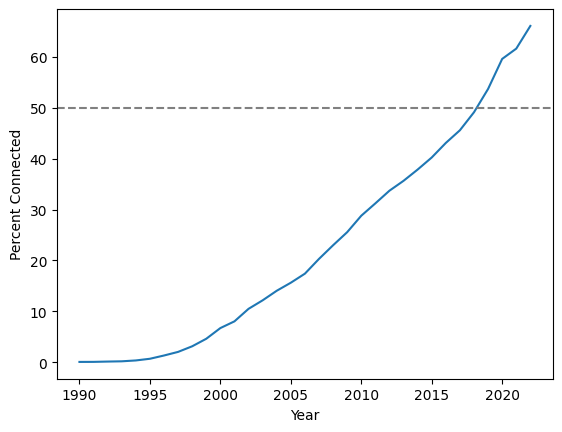

In [10]:
import matplotlib.pyplot as plt
plt.plot(df['year'], df['percent'])
plt.axhline(50, color='gray', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Percent Connected')
plt.show()

The graph shows that over 50% of the world became connected to the internet by 2020.

### Finding the year we crossed 50%

Plotting the data provides a visual estimate of the year the world crossed 50% internet connected. Now let's use the `query( )` and `head( )` methods to find the crossing point in our data.



In [11]:
over_half_connected = df.query('percent >= 50')
over_half_connected.head(1)

,year,internet_users,population,percent
29,2019,4194000000,7.811294e+09,53.69


The first year to surpass 50% was 2019.

While the Internet has grown exponentially, we still have work to do to ensure we are all connected as a global community.

## Project extensions

The file `extension-internet-users-by-continent.csv` provides data on the number of internet users across each continent, while the file `extension-historical-population-by-continent.csv` details historical population counts for each continent.

Here are some suggested extensions for your project:

1. Determine the year when more than 50% of the population in a continent of your choice first gained internet access.

2. Explore and analyze internet usage and population data for a specific region or country of interest, such as by sourcing information from sites like ourworldindata.org.

In [12]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'extension-internet-users-by-continent.csv' and 'extension-historical-population-by-continent.csv'.

# from google.colab import files
# uploaded = files.upload()

In [13]:
population_by_continent = pd.read_csv('extension-historical-population-by-continent.csv')
population_by_continent

,continent,year,population
0,Africa,-10000,1118546
1,Africa,-9000,1214579
2,Africa,-8000,1355402
...,...,...,...
1587,South America,2021,428331420
1588,South America,2022,430492814
1589,South America,2023,433024230


In [14]:
internet_users_by_continent = pd.read_csv('extension-internet-users-by-continent.csv')
internet_users_by_continent

,continent,year,internet_users
0,Africa,1990,0.000000e+00
1,Africa,1991,5.537650e+03
2,Africa,1992,1.649741e+04
...,...,...,...
189,South America,2019,2.815900e+08
190,South America,2020,3.102178e+08
191,South America,2021,3.177395e+08


In [35]:
south_america_population = population_by_continent.query("continent == 'South America'").drop(columns=['continent'])
south_america_population


,year,population
1325,-10000,1097843
1326,-9000,1340448
1327,-8000,1645183
...,...,...
1587,2021,428331420
1588,2022,430492814
1589,2023,433024230


In [32]:
south_america_internet_users = internet_users_by_continent.query("continent == 'South America'").drop(columns=['continent'])
south_america_internet_users

,year,internet_users
160,1990,0.000000e+00
161,1991,4.988953e+03
162,1992,2.912612e+04
...,...,...
189,2019,2.815900e+08
190,2020,3.102178e+08
191,2021,3.177395e+08


In [36]:
south_america_population_internet_users = south_america_internet_users.merge(south_america_population, on = 'year', how = 'left')
south_america_population_internet_users

,year,internet_users,population
0,1990,0.000000e+00,295639581
1,1991,4.988953e+03,301035778
2,1992,2.912612e+04,306386107
...,...,...,...
29,2019,2.815900e+08,423548289
30,2020,3.102178e+08,426213551
31,2021,3.177395e+08,428331420


In [39]:
south_america_population_internet_users['percent'] = south_america_population_internet_users.eval('internet_users/population * 100').round(2)
south_america_population_internet_users

,year,internet_users,population,percent
0,1990,0.000000e+00,295639581,0.00
1,1991,4.988953e+03,301035778,0.00
2,1992,2.912612e+04,306386107,0.01
...,...,...,...,...
29,2019,2.815900e+08,423548289,66.48
30,2020,3.102178e+08,426213551,72.78
31,2021,3.177395e+08,428331420,74.18


In [44]:
south_america_population_internet_users.query('percent >= 50').head(1)

,year,internet_users,population,percent
23,2013,203940700.0,402022549,50.73


In [46]:
country_internet_use = pd.read_csv('share-of-individuals-using-the-internet.csv')
country_internet_use

,Entity,Code,Year,Individuals using the Internet (% of population)
0,Afghanistan,AFG,1990,0.0000
1,Afghanistan,AFG,1991,0.0000
2,Afghanistan,AFG,1992,0.0000
...,...,...,...,...
7148,Zimbabwe,ZWE,2020,29.2986
7149,Zimbabwe,ZWE,2021,32.4616
7150,Zimbabwe,ZWE,2022,32.5615


In [51]:
brazil_internet_use = country_internet_use.query("Entity == 'Brazil'")
brazil_internet_use = brazil_internet_use.rename(columns={'Individuals using the Internet (% of population)': 'internet_percent'})
brazil_internet_use

,Entity,Code,Year,internet_percent
822,Brazil,BRA,1990,0.000000
823,Brazil,BRA,1991,0.003288
824,Brazil,BRA,1992,0.012946
...,...,...,...,...
853,Brazil,BRA,2021,80.689900
854,Brazil,BRA,2022,80.527800
855,Brazil,BRA,2023,84.150600


In [52]:
half_access_internet = brazil_internet_use.query("internet_percent >= 50")
half_access_internet

,Entity,Code,Year,internet_percent
845,Brazil,BRA,2013,51.0400
846,Brazil,BRA,2014,54.5510
847,Brazil,BRA,2015,58.3280
...,...,...,...,...
853,Brazil,BRA,2021,80.6899
854,Brazil,BRA,2022,80.5278
855,Brazil,BRA,2023,84.1506
